<a href="https://colab.research.google.com/github/adnanelhayani/Lab1/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("prices.csv")
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       70.836986      70.857109      70.118414      71.543476   
std        83.695876      83.689686      82.877294      84.465504   
min         0.850000       0.860000       0.830000       0.880000   
25%        33.840000      33.849998      33.480000      34.189999   
50%        52.770000      52.799999      52.230000      53.310001   
75%    

In [10]:
# Transformer la colonne 'symbol' en valeurs numériques
df['symbol'] = pd.factorize(df['symbol'])[0]
print(df.head())


                  date  symbol        open       close         low  \
0  2016-01-05 00:00:00       0  123.430000  125.839996  122.309998   
1  2016-01-06 00:00:00       0  125.239998  119.980003  119.940002   
2  2016-01-07 00:00:00       0  116.379997  114.949997  114.930000   
3  2016-01-08 00:00:00       0  115.480003  116.620003  113.500000   
4  2016-01-11 00:00:00       0  117.010002  114.970001  114.089996   

         high     volume  
0  126.250000  2163600.0  
1  125.540001  2386400.0  
2  119.739998  2489500.0  
3  117.440002  2006300.0  
4  117.330002  1408600.0  


In [11]:
print(df.tail())


                       date  symbol        open       close         low  \
851259           2016-12-30     465  103.309998  103.199997  102.849998   
851260           2016-12-30     466   43.070000   43.040001   42.689999   
851261           2016-12-30     484   53.639999   53.529999   53.270000   
851262  2016-12-30 00:00:00     467   44.730000   45.450001   44.410000   
851263  2016-12-30 00:00:00     500   54.200001   53.630001   53.389999   

              high     volume  
851259  103.930000   973800.0  
851260   43.310001  1938100.0  
851261   53.740002  1701200.0  
851262   45.590000  1380900.0  
851263   54.480000   705100.0  


In [12]:
# Supprimer la colonne 'date'
df = df.drop(columns=['date'])



In [13]:
# Vérifier les lignes dupliquées
duplicates = df.duplicated()

# Afficher les lignes dupliquées
print("Lignes dupliquées :")
print(df[duplicates])

# Supprimer les lignes dupliquées
df = df.drop_duplicates()

print("\nDataFrame après suppression des duplications :")
print(df)


Lignes dupliquées :
       symbol       open      close        low       high  volume
14374     468  29.740000  29.740000  29.740000  29.740000     0.0
16246     468  29.700001  29.700001  29.700001  29.700001     0.0
16714     468  29.700001  29.700001  29.700001  29.700001     0.0
32158     468  35.000000  35.000000  35.000000  35.000000     0.0
78109     468  33.750000  33.750000  33.750000  33.750000     0.0
80454     468  34.000000  34.000000  34.000000  34.000000     0.0

DataFrame après suppression des duplications :
        symbol        open       close         low        high     volume
0            0  123.430000  125.839996  122.309998  126.250000  2163600.0
1            0  125.239998  119.980003  119.940002  125.540001  2386400.0
2            0  116.379997  114.949997  114.930000  119.739998  2489500.0
3            0  115.480003  116.620003  113.500000  117.440002  2006300.0
4            0  117.010002  114.970001  114.089996  117.330002  1408600.0
...        ...         ...

In [14]:
# Vérifier les lignes vides (NaN)
empty_rows = df.isnull().any(axis=1)

# Afficher les lignes vides
print("Lignes vides :")
print(df[empty_rows])

# Supprimer les lignes vides
df = df.dropna()


Lignes vides :
Empty DataFrame
Columns: [symbol, open, close, low, high, volume]
Index: []


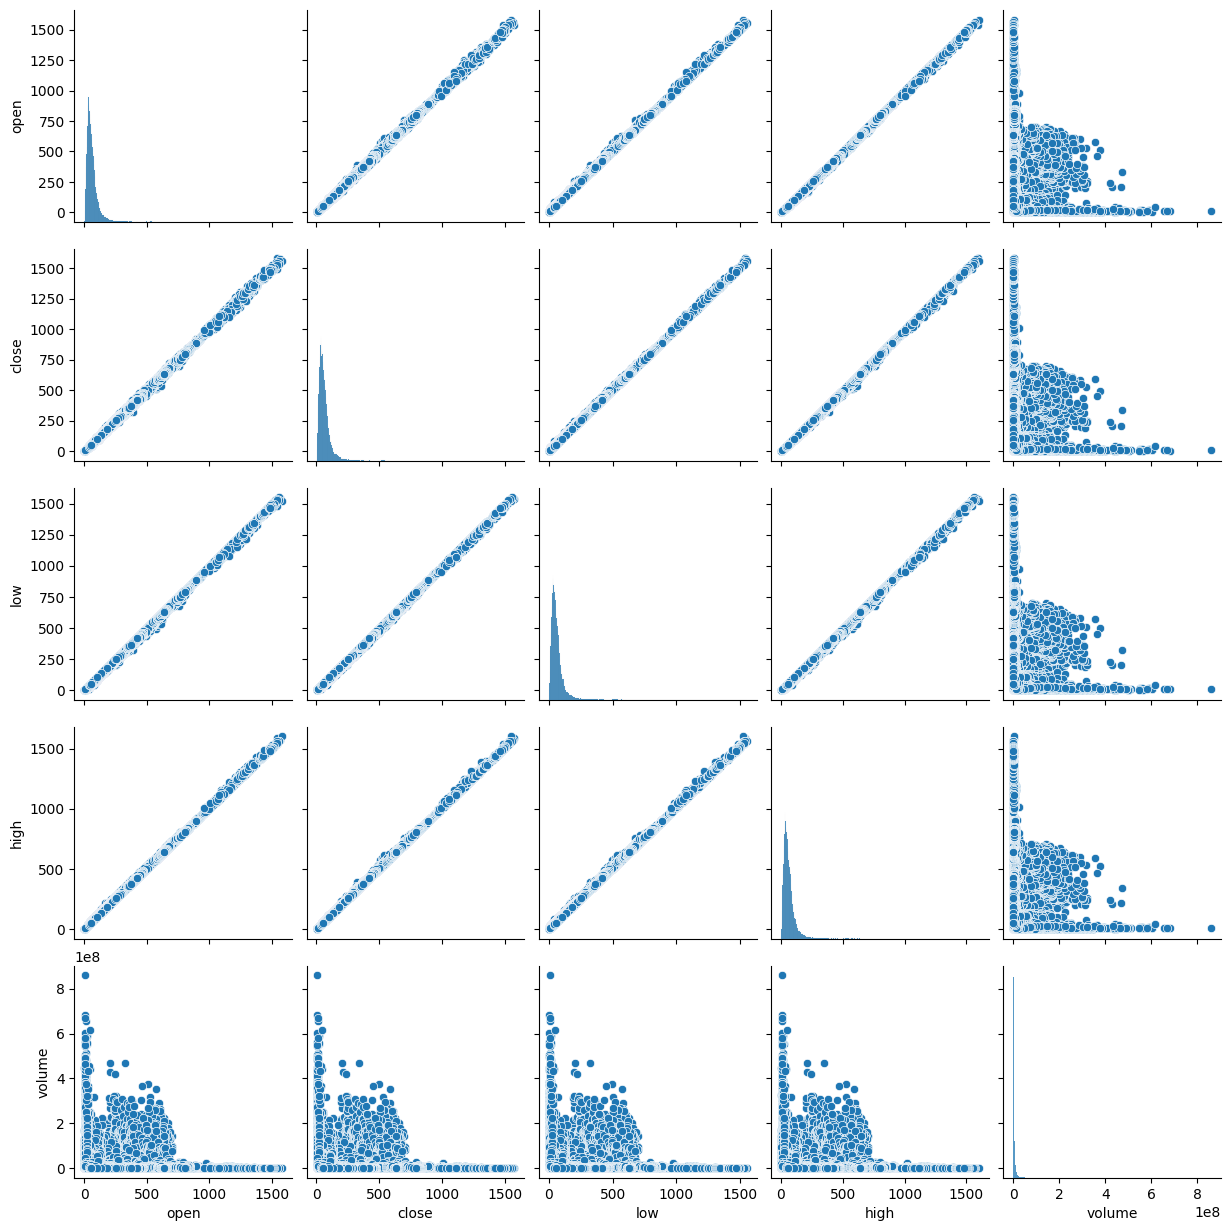

In [15]:
# Visualize distributions and relationships
sns.pairplot(df[['open', 'close', 'low', 'high', 'volume']])
plt.show()

In [16]:
# Afficher les types de données de chaque colonne
print(df.dtypes)

symbol      int64
open      float64
close     float64
low       float64
high      float64
volume    float64
dtype: object


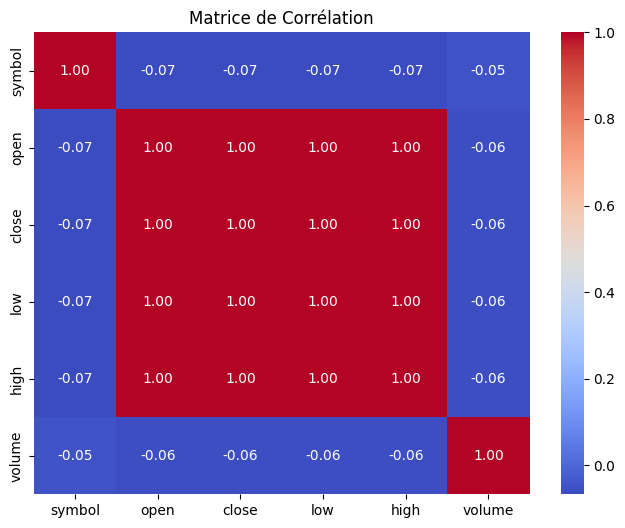

In [18]:
# Calculer la corrélation entre les colonnes restantes
correlation_matrix = df.corr()

# Visualiser la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

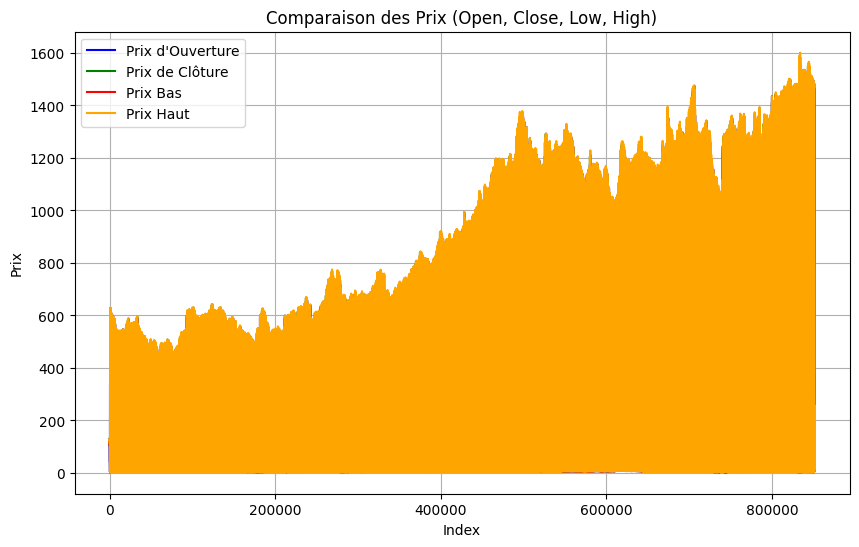

In [19]:
# Comparer les prix d'ouverture, de clôture, bas et haut
plt.figure(figsize=(10, 6))
plt.plot(df['open'], label='Prix d\'Ouverture', color='blue')
plt.plot(df['close'], label='Prix de Clôture', color='green')
plt.plot(df['low'], label='Prix Bas', color='red')
plt.plot(df['high'], label='Prix Haut', color='orange')
plt.title('Comparaison des Prix (Open, Close, Low, High)')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

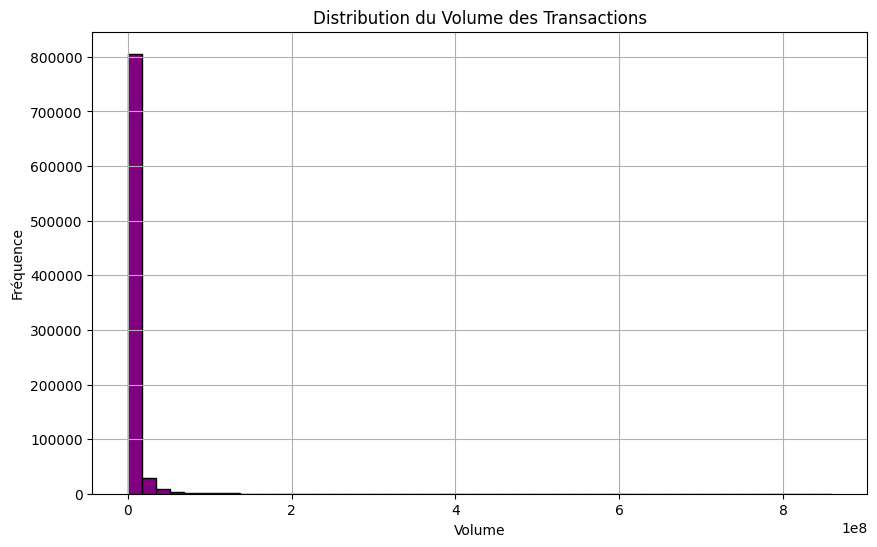

In [20]:
# Histogramme du volume des transactions
plt.figure(figsize=(10, 6))
plt.hist(df['volume'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution du Volume des Transactions')
plt.xlabel('Volume')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()


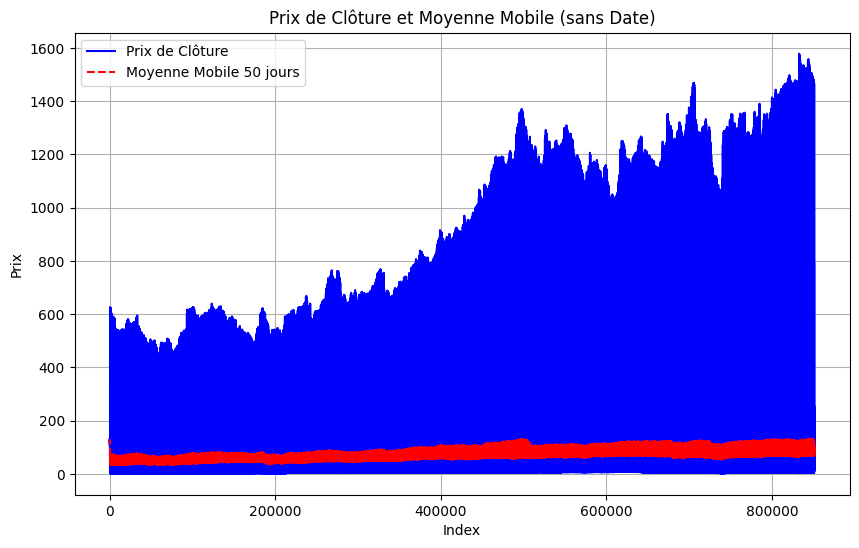

In [21]:
# Calculer la moyenne mobile sur 50 jours pour le prix de clôture
df['MA50'] = df['close'].rolling(window=50).mean()

# Tracer la courbe de la clôture et de la moyenne mobile
plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Prix de Clôture', color='blue')
plt.plot(df['MA50'], label='Moyenne Mobile 50 jours', color='red', linestyle='--')
plt.title('Prix de Clôture et Moyenne Mobile (sans Date)')
plt.xlabel('Index')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['open', 'close', 'low', 'high', 'volume']] = scaler.fit_transform(df[['open', 'close', 'low', 'high', 'volume']])

# Prepare data
X = df[['open', 'low', 'high', 'volume']].values
y = df['close'].values

# Normalize data (optional, but useful for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the model
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(4, 64)  # 4 features (input)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # 1 output (regression)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, define the loss function and optimizer
model = DNN()
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()

    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")


Epoch [10/100], Loss: 0.5251
Epoch [20/100], Loss: 0.1995
Epoch [30/100], Loss: 0.0269
Epoch [40/100], Loss: 0.0088
Epoch [50/100], Loss: 0.0080
Epoch [60/100], Loss: 0.0025
Epoch [70/100], Loss: 0.0017
Epoch [80/100], Loss: 0.0009
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0004
Test Loss: 0.0004


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [200, 500]
}

# Initialize the model
mlp = MLPRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)


Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}


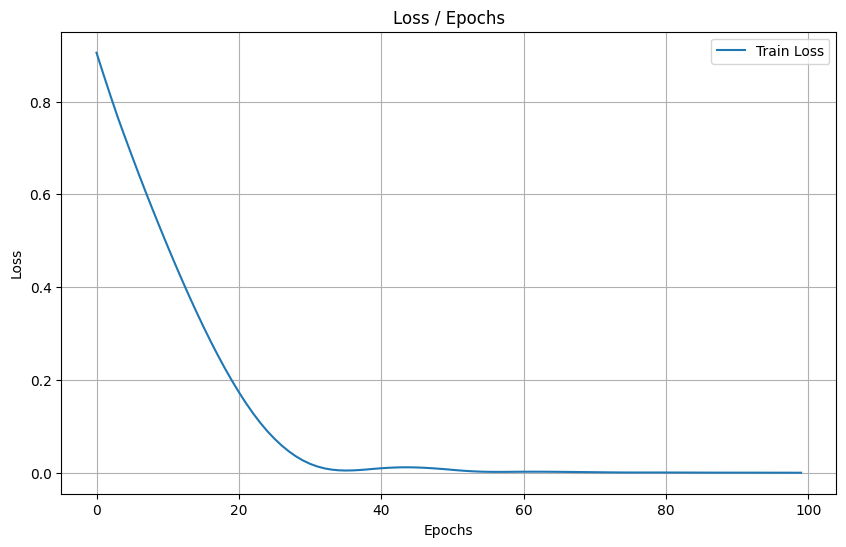

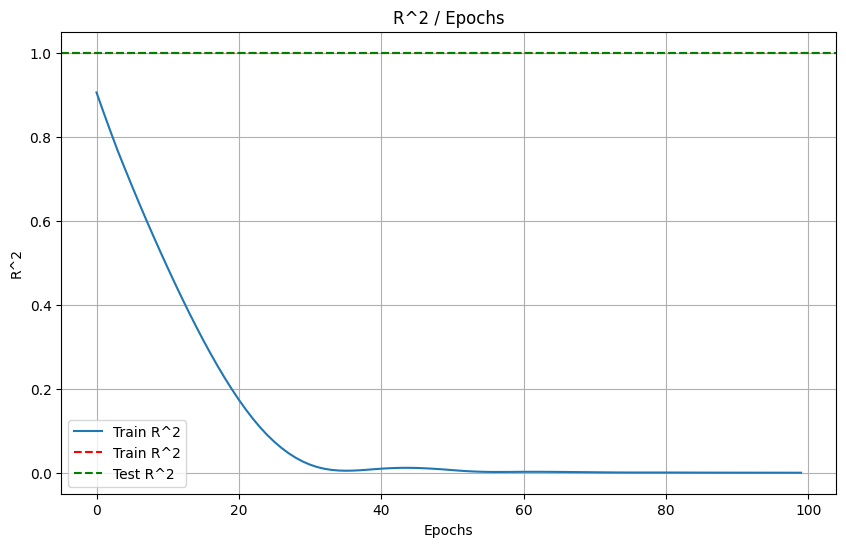

In [25]:
# Plot Loss / Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.title('Loss / Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# For accuracy, we would typically use a classification task; however, we will calculate R^2 or similar regression metrics
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, model(X_train_tensor).detach().numpy())
test_r2 = r2_score(y_test, test_predictions.detach().numpy())

# Plot R^2 / Epochs (regression metric)
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train R^2')
plt.axhline(y=train_r2, color='r', linestyle='--', label="Train R^2")
plt.axhline(y=test_r2, color='g', linestyle='--', label="Test R^2")
plt.title('R^2 / Epochs')
plt.xlabel('Epochs')
plt.ylabel('R^2')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
class DNNWithRegularization(nn.Module):
    def __init__(self):
        super(DNNWithRegularization, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)  # Dropout layer with 50% dropout

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout after first hidden layer
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# L2 Regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Apply L2 regularization

# Train the model with regularization (same as before)


Epoch [10/100], Training Loss: 0.7986, Test Loss: 1.3906
Epoch [20/100], Training Loss: 0.6265, Test Loss: 1.0998
Epoch [30/100], Training Loss: 0.4688, Test Loss: 0.8266
Epoch [40/100], Training Loss: 0.3047, Test Loss: 0.5097
Epoch [50/100], Training Loss: 0.1490, Test Loss: 0.1999
Epoch [60/100], Training Loss: 0.0582, Test Loss: 0.0218
Epoch [70/100], Training Loss: 0.0512, Test Loss: 0.0022
Epoch [80/100], Training Loss: 0.0497, Test Loss: 0.0014
Epoch [90/100], Training Loss: 0.0447, Test Loss: 0.0053
Epoch [100/100], Training Loss: 0.0447, Test Loss: 0.0080


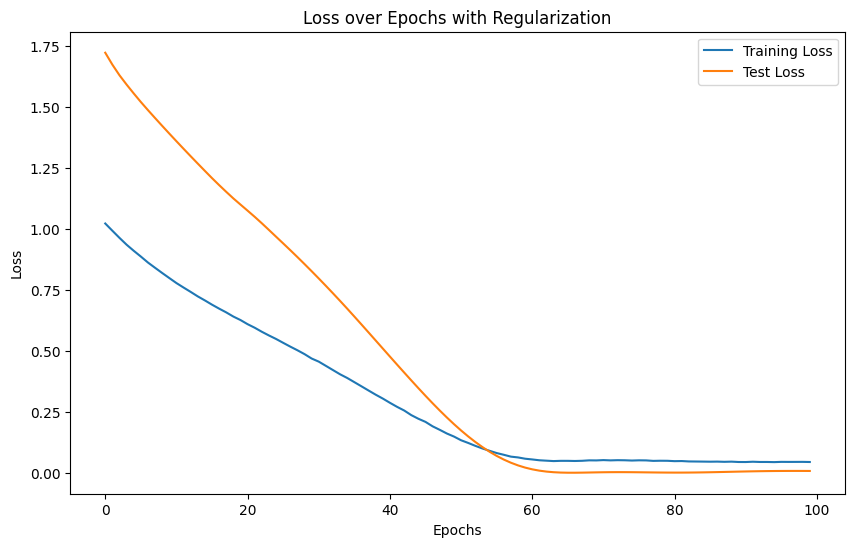

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Définition de la classe du modèle avec régularisation
class DNNWithRegularization(nn.Module):
    def __init__(self):
        super(DNNWithRegularization, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)  # Dropout layer avec un taux de 50%

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Appliquer le dropout après la première couche cachée
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Préparer les données (Assurez-vous que df est déjà prétraité, comme vous l'avez fait précédemment)
X = df[['open', 'close', 'low', 'high']].values  # Les features
y = df['close'].values  # La variable cible

# Conversion en tenseurs
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Diviser les données en ensemble d'entraînement et de test
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialiser le modèle
model = DNNWithRegularization()

# Définir l'optimiseur avec L2 regularization (weight_decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # L2 Regularization

# Définir la fonction de perte (MSE pour la régression)
criterion = nn.MSELoss()

# Variables pour suivre l'évolution de la perte
train_losses = []
test_losses = []

# Nombre d'époques
epochs = 100

# Entraînement du modèle
for epoch in range(epochs):
    model.train()  # Mode entraînement
    optimizer.zero_grad()  # Réinitialiser les gradients

    # Passer les données d'entraînement à travers le modèle
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Calcul des gradients et mise à jour des poids
    loss.backward()
    optimizer.step()

    # Évaluation sur les données de test
    model.eval()  # Mode évaluation
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)

    # Stocker les pertes pour l'affichage
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    # Afficher la perte chaque 10 époques
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

# Tracer les courbes de perte pour l'entraînement et le test
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over Epochs with Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
